# Machine Learning Course - Level 1
### Mentor Session 5 by Weipeng Shao
### Objective: Simple cases for NLP and practice on PCA
### Data of Spam Filter: https://www.kaggle.com/karthickveerakumar/spam-filter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time # for time cost
%matplotlib inline

In [2]:
# # Do the following steps first in your Terminal or Command:
# ./pip install urllib
# ./pip install nltk
# ./pip install bs4
# ./pip install ??

In [3]:
# Main tool: Natural Language Toolkit
import nltk

## Simple Practice for Natural Language Processing

In [72]:
# Download the subpackages for nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Examples: Analyze Text from a Website, Tokenization, Stemming, BOW, N-Grams

In [5]:
# urllib module for accessing website data
import urllib.request
# Use BeautifulSoup to clean the html (remove the html labels)
from bs4 import BeautifulSoup

#### --check on the website we deal with: http://php.net

In [6]:
# Try to open some url
response = urllib.request.urlopen('http://php.net/')
# Read the content
html = response.read()
# Clean the text
soup = BeautifulSoup(html,'html5lib')  # need to install 'html5lib' module (a parser)
text = soup.get_text(strip=True)
# Split the text into tokens
tokens = text.split()

In [83]:
tokens

['PHP:',
 'Hypertext',
 'PreprocessorDownloadsDocumentationGet',
 'InvolvedHelpGetting',
 'StartedIntroductionA',
 'simple',
 'tutorialLanguage',
 'ReferenceBasic',
 'syntaxTypesVariablesConstantsExpressionsOperatorsControl',
 'StructuresFunctionsClasses',
 'and',
 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences',
 'ExplainedPredefined',
 'VariablesPredefined',
 'ExceptionsPredefined',
 'Interfaces',
 'and',
 'ClassesContext',
 'options',
 'and',
 'parametersSupported',
 'Protocols',
 'and',
 'WrappersSecurityIntroductionGeneral',
 'considerationsInstalled',
 'as',
 'CGI',
 'binaryInstalled',
 'as',
 'an',
 'Apache',
 'moduleSession',
 'SecurityFilesystem',
 'SecurityDatabase',
 'SecurityError',
 'ReportingUsing',
 'Register',
 'GlobalsUser',
 'Submitted',
 'DataMagic',
 'QuotesHiding',
 'PHPKeeping',
 'CurrentFeaturesHTTP',
 'authentication',
 'with',
 'PHPCookiesSessionsDealing',
 'with',
 'XFormsHandling',
 'file',
 'uploadsUsing',
 'remote',
 'filesConnection',
 'handlingPer

In [7]:
len(tokens)

2018

#### Text Frequency

In [86]:
freq = nltk.FreqDist(tokens)

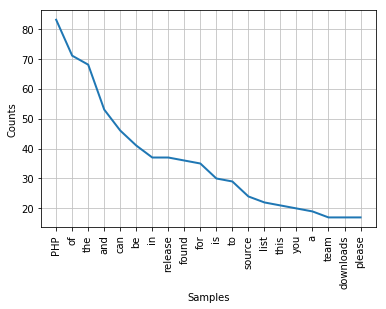

In [95]:
freq.plot(20,cumulative=False)

In [96]:
# Stopwords
nltk.corpus.stopwords.words('english')  # the list of stopwords in English

In [93]:
# Delete the stopwords
tokens_cleaned = list()

sr = nltk.corpus.stopwords.words('english')

for token in tokens:
    if token not in sr:
        tokens_cleaned.append(token)
        
# [token for token in tokens if not token in sr]   # another way to perform this

In [12]:
len(tokens_cleaned)

1455

In [13]:
freq_cleaned = nltk.FreqDist(tokens_cleaned)

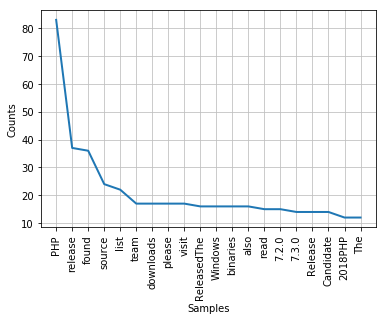

In [14]:
freq_cleaned.plot(20,cumulative=False)

#### Tokenization

In [15]:
# For sentence: sent_tokenize
# For words: word_tokenize

In [16]:
# e.g.
mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
nltk.tokenize.sent_tokenize(mytext)

['Hello Adam, how are you?',
 'I hope everything is going well.',
 'Today is a good day, see you dude.']

In [17]:
# Punctuation marks in special cases (e.g. abbreviations) are ignored in tokenization
mytext2 = "This is Dr. Wang. Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
nltk.tokenize.sent_tokenize(mytext2)

['This is Dr. Wang.',
 'Hello Mr. Adam, how are you?',
 'I hope everything is going well.',
 'Today is a good day, see you dude.']

In [97]:
# nltk.tokenize.word_tokenize(mytext2)

In [98]:
# Do not ignore special punctuation marks
# nltk.tokenize.wordpunct_tokenize(mytext2)

In [20]:
# # Tokenization on the web text
tokens_nltk = nltk.tokenize.word_tokenize(text)
# Delete the stopwords
tokens_nltk_cleaned = list()

sr = nltk.corpus.stopwords.words('english')

for token in tokens_nltk:
    if token not in sr:
        tokens_nltk_cleaned.append(token)

In [21]:
len(tokens_nltk_cleaned)

1589

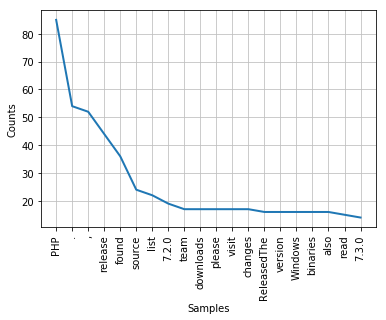

In [22]:
freq_nltk = nltk.FreqDist(tokens_nltk_cleaned)
freq_nltk.plot(20,cumulative=False)

In [23]:
punctuations = [',','.',':',';','?','(',')','[',']','&','!','*','@','#','$','%','{','}']

In [24]:
tokens_nltk_cleaned_nopunc = [word for word in tokens_nltk_cleaned if not word in punctuations]

In [25]:
len(tokens_nltk_cleaned_nopunc)

1468

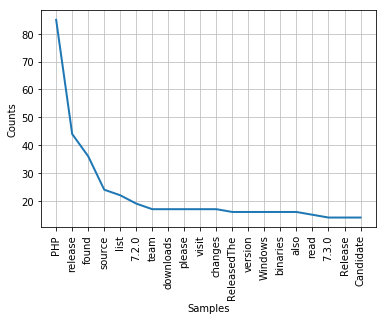

In [26]:
freq_nltk_nopunc = nltk.FreqDist(tokens_nltk_cleaned_nopunc)
freq_nltk_nopunc.plot(20,cumulative=False)

#### Stemming

In [27]:
stemmer = nltk.stem.PorterStemmer()
# check on nltk.stem.LancasterStemmer()

In [28]:
# e.g.
stemmer.stem('working')
stemmer.stem('university')
stemmer.stem('universal')

'work'

'univers'

'univers'

#### Lemmatizing: return accurately a word, slower than stemming

In [104]:
lematizer = nltk.stem.WordNetLemmatizer()
lematizer.lemmatize('working')
lematizer.lemmatize('increased')
lematizer.lemmatize('increases')
lematizer.lemmatize('universities')
lematizer.lemmatize('works')

'working'

'increased'

'increase'

'university'

'work'

In [30]:
tokens_stemmed = [stemmer.stem(word) for word in tokens_nltk_cleaned_nopunc]

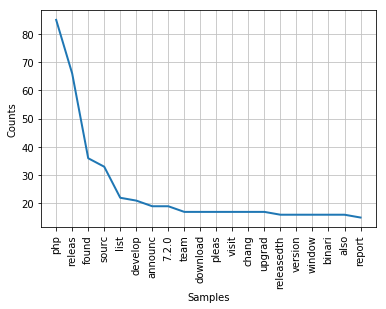

In [31]:
freq_stemmed = nltk.FreqDist(tokens_stemmed)
freq_stemmed.plot(20,cumulative=False)

In [32]:
len(tokens_stemmed)
freq_stemmed.B() #Return the total number of sample values (or "bins") that have counts greater than zero.
print('# of different words before stemming:',len(freq_nltk_nopunc.keys()))
print('# of different words after stemming:',len(freq_stemmed.keys()))

1468

334

# of different words before stemming: 355
# of different words after stemming: 334


In [111]:
# Bag of Words
# freq_stemmed.items()
keys = list(freq_stemmed.keys())
frequencies = list(freq_stemmed.values())

In [113]:
# pd.DataFrame(frequencies,index=keys,columns=['freq']).reset_index()
df = pd.DataFrame([keys,frequencies]).T
df.columns = ['key','freq']
df.sort_values(by='freq',ascending=False)[:5]

,key,freq
0,php,85
144,releas,66
164,found,36
157,sourc,33
192,list,22


#### UniGram

In [35]:
# Brown is a corpus distributed in NLTK
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')[:2]  #tags: Part-of-speech(POS) tagging
brown_sents = brown.sents(categories='news')[0]

In [36]:
# brown_sents
# brown_tagged_sents

In [37]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

In [38]:
unigram_tagger.tag(['help'])
unigram_tagger.tag(brown_sents)
unigram_tagger.evaluate(gold=brown_tagged_sents)
# Score the accuracy of the tagger against the gold standard. 
# Strip the tags from the gold standard text, retag it using the tagger, then compute the accuracy score.

[('help', None)]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

0.9852941176470589

#### For the method of evaluation, check on: Gold Standards Evaluation

#### Bigram

In [39]:
# Tools to identify collocations --- words that often appear consecutively within corpora
# For further learning, see the documents of nltk
bm = nltk.collocations.BigramAssocMeasures()
# finding and ranking of bigram collocations 
bf = nltk.collocations.BigramCollocationFinder.from_words(tokens_stemmed)
bf.apply_freq_filter(3)  # apply some filter

In [131]:
bf.score_ngrams(bm.raw_freq)[:10]   # Score n-gram by frequency

[(('download', 'php'), 0.011580381471389645),
 (('pleas', 'visit'), 0.011580381471389645),
 (('sourc', 'download'), 0.011580381471389645),
 (('binari', 'found'), 0.010899182561307902),
 (('releasedth', 'php'), 0.010899182561307902),
 (('sourc', 'binari'), 0.010899182561307902),
 (('window', 'sourc'), 0.010899182561307902),
 (('releas', 'candid'), 0.009536784741144414),
 (('announc', 'immedi'), 0.008174386920980926),
 (('avail', 'php'), 0.008174386920980926)]

#### What else? TF-IDF
--- check this in nltk

### Work on Some Dataset

In [141]:
# data.iloc[0]['text']
# data['spam'].sum()

In [41]:
data = pd.read_csv('./data/emails.csv')

In [42]:
data_fewer = data[data['spam']==1][:100].append(data[data['spam']==0][:200]).set_index('text').reset_index()

In [43]:
data_text = data_fewer['text']

In [44]:
# This is intuitively but slow, try to find some better way
t0=time()
Bag = []
stemmer = nltk.stem.PorterStemmer()

for email in data_text[:]:
    words = nltk.tokenize.word_tokenize(email)
    words = [stemmer.stem(word) for word in words]
    # delete some stopwords
    # delete the punctuations
    # delete some speial marks such as "_,®ÅÍŒ"
#     freq = nltk.FreqDist(words)
#     keys = freq.keys()
#     values = freq.values()
#     words = set{words} # avoid repetition
    for word in words:
        Bag.append(word)
print(time()-t0)

3.4829187393188477


In [45]:
# Check the total # of words
len(Bag)

118449

In [144]:
fq = nltk.FreqDist(Bag)

In [146]:
# fq.plot(20)

In [46]:
# Number of different words
Bag_set = set(Bag)
len(Bag_set)

7119

#### -- Sometimes we also consider deleting the words that have low frequency.

In [47]:
# To store the bag of words
df_Bag = pd.DataFrame(index=Bag_set,columns=np.arange(300))

In [48]:
# df = pd.DataFrame([keys,frequencies]).T.set_index(0)

In [49]:
t0=time()
for i in np.arange(300):
    email = data_text[i]
    words = nltk.tokenize.word_tokenize(email)
    words = [stemmer.stem(word) for word in words]
    freq = nltk.FreqDist(words)
    keys = freq.keys()
    values = freq.values()
    
    df = pd.DataFrame([keys,values]).T.set_index(0)
    
    df_Bag[i].loc[df.index] = df.values
print(time()-t0)

8.47152304649353


In [50]:
df_Bag.sum().sum()

118449.0

In [51]:
df_Bag.fillna(0,inplace=True)

In [52]:
X = df_Bag.T

## Principal Component Analysis
#### -- Fitting an $n$-dimensional ellipsoid to the data
#### -- Maximize information in the sense of variance
#### -- Linear dimensionality reduction


### Derive from eigen value point of view
A vector of $p$ random variables: 
$$x=(x_1,..,x_p)^T$$
with $Var[x]=\Sigma$, symmetric and positive semidefinite, and its eigen values $\lambda_1\ge\lambda_2\ge...\ge\lambda_p\ge 0$.

#### Intuitive: find a linear combination
$$a_1^Tx=a_{11}x_1+..+a_{1p}x_p=\sum_{j=1}^pa_{1j}x_j$$
that has maximum variance.

#### The following optimization problem:
$$\max_{a_1}\quad Var[a_1^Tx]=a_1^T\Sigma a_1$$
$$s.t.\quad a_1^Ta_1=1$$
Lagrange multiplier:
$$L=a_1^T\Sigma a_1-\lambda(a_1^Ta_1-1)$$
Derivation gives (KKT condition):
$$(\Sigma-\lambda I_p)a_1=0$$
Thus $\lambda$ should be an eigenvalue of $\Sigma$.
$$a_1^T\Sigma a_1 = a_1^T\lambda a_1=\lambda$$
Thus $\lambda = \lambda_1$, and $a_1$ be the corresponging eigenvector.

#### Intuitive 2: find another linear combination
$$a_k^Tx=a_{k1}x_1+..+a_{kp}x_p=\sum_{j=1}^pa_{kj}x_j$$
that has maximum variance, subject to $Cov[a_i^Tx,a_k^Tx]=0,\ i<k$. For $k=2$, this is actually equivalent to $a_1^Ta_2=0$. 

#### One can derive that $Var[a_k^Tx]=\lambda_k$, $a_k$ be the eigenvector corresponding to $\lambda_k$, and they are orthogonal to each other because $\Sigma$ is symmetric.

In practical analysis, covariance is estimated by sample covariance (empirical covariance matrix).
$$Cov(x,y)=\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}).$$

#### Percentage of Information:

Represented by the percentage of variance $$\frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^p\lambda_i}$$

#### Principal components:

The principal components decomposition of X becomes 
$$T = ax=(a_1^T,...,a_p^T)x$$
where $a$ represents the component axes.

#### When $x$ is of zero mean:

If $x$ is of zero mean and we represent it by $X=(x_1,..,x_p)=x^T$, then $\bar{\Sigma}=X^TX$. Write $W=a^T$, then we have 
$$X^TX = WEW^T,\ T=XW$$
where $E$ is the diagonal matrix of eigenvalues of $X^TX$.

#### SVD (Singular Value Decomposition) point of view:

$$X=U\Sigma W^T$$
where $\Sigma$ is a $n\times p$ rectangular digonal matrix of singular values of $X$ (i.e., square roots of $X^TX$). $U$ is $n\times n$, composed of $n$ orthogonal unit vectors of length $n$. $W$ is $p\times p$, composed of $p$ orthogonal unit vectors of length $p$.

Thus $$X^TX=W\Sigma^T\Sigma W^T$$
and this $W$ becomes the same one as in eigenvalue decomposition of $X^TX$. In this case we have 
$$T=XW=U\Sigma W^TW=U\Sigma$$

In [53]:
from sklearn.decomposition import PCA

In [54]:
# form of X: (n_samples,p_features)
X = df_Bag.T.values
X.shape

(300, 7119)

In [55]:
pca = PCA(n_components=3)

In [56]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [57]:
pca.fit(X)
X_new = pca.fit_transform(X)    # apply dimensionality reduction on X

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [58]:
#### Principal axes in feature space, not the principal components! actually the 'a' random vector.
pca.components_

array([[  4.12268981e-05,   5.77344476e-03,  -2.04320338e-05, ...,
         -2.21417632e-05,   1.20525063e-04,   7.49269791e-04],
       [ -6.04774919e-05,   1.88089434e-03,  -2.59282875e-05, ...,
         -2.41102763e-05,  -1.19422603e-04,  -9.46237111e-04],
       [  5.87176948e-05,   8.16275471e-03,  -1.29481829e-05, ...,
         -1.21289155e-05,  -3.82122689e-05,  -2.48946357e-04]])

In [59]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([ 0.49033056,  0.16908643,  0.09023837])

array([ 0.49033056,  0.659417  ,  0.74965537])

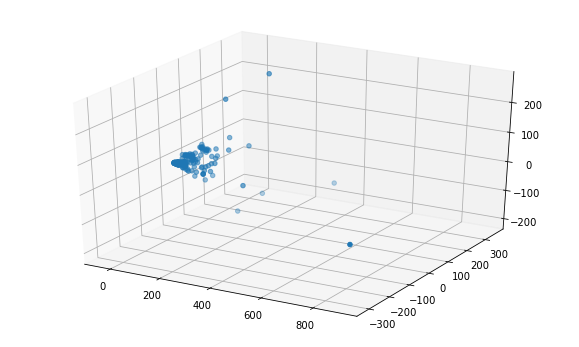

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_new[:,0],X_new[:,1],X_new[:,2])

In [61]:
X_new.shape

(300, 3)

#### Choose the best $k$ (ratio of variance > 0.99)

In [62]:
pca_temp = PCA()
pca_temp.fit(X)
pca_temp.explained_variance_ratio_.cumsum()[:90]
true_table = pca_temp.explained_variance_ratio_.cumsum()>0.99
for i in np.arange(len(true_table)):
    if true_table[i]==True:
        break
print('The best k is:', i+1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([ 0.49033056,  0.659417  ,  0.74965537,  0.81895854,  0.86455031,
        0.89072366,  0.9052452 ,  0.91436075,  0.92274129,  0.92955653,
        0.93558958,  0.94007137,  0.94405064,  0.94766199,  0.95082805,
        0.95316402,  0.95521016,  0.95718004,  0.95892087,  0.96043114,
        0.96189985,  0.96331268,  0.96449288,  0.96562834,  0.96671219,
        0.9677476 ,  0.96874481,  0.96970227,  0.97062491,  0.97147947,
        0.9722878 ,  0.97304256,  0.97375812,  0.97445514,  0.9751049 ,
        0.97573857,  0.97635152,  0.97695986,  0.97753464,  0.97809028,
        0.97862108,  0.97913699,  0.97963792,  0.98012326,  0.9805839 ,
        0.98104004,  0.98147131,  0.98187912,  0.9822712 ,  0.9826467 ,
        0.98300906,  0.98336126,  0.98370309,  0.98403311,  0.98436056,
        0.98468044,  0.98499225,  0.98529532,  0.98557791,  0.98585794,
        0.98612691,  0.98639236,  0.98664771,  0.98689508,  0.98713841,
        0.98737752,  0.98760762,  0.98782844,  0.98804519,  0.98

The best k is: 80


### Classification

In [63]:
y = np.mat(data_fewer['spam'].values).T
y.shape

(300, 1)

In [64]:
x = np.mat(X_new)
x.shape

(300, 3)

In [65]:
import sklearn.linear_model.logistic as sklog

In [66]:
lgt = sklog.LogisticRegression(penalty='l2',fit_intercept=True)
lgt.fit(x,y)
lgt.intercept_
lgt.coef_

/Users/chunse/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([-1.24123489])

array([[-0.01638217, -0.05360403,  0.00487006]])

In [67]:
x_old = np.mat(X)

In [68]:
lgt = sklog.LogisticRegression(penalty='l2',fit_intercept=True)
lgt.fit(x_old,y)
lgt.intercept_
lgt.coef_

/Users/chunse/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([-0.12072529])

array([[  6.96567192e-07,  -6.69928482e-02,   6.79707502e-02, ...,
          9.02234926e-03,  -7.94381734e-03,  -1.60163359e-03]])

#### -- Check on Probabilistic Graphical Model